In [1]:
import os

In [7]:
book_dir = "C:/indra Files/DOCUMENTS/Books"
os.listdir(book_dir)

['English', 'French', 'German', 'Spanish']

In [8]:
def count_words(text):
  text = text.lower()
  skips = [".", ",",";", ":", "'", '"']
  for ch in skips:
    text = text.replace(ch, "")

  word_counts = {}
  for word in text.split(" "):
    # known word
    if word in word_counts:
      word_counts[word] += 1
    #unknown word
    else:
      word_counts[word] = 1
  return word_counts

In [12]:
def read_book(title_path):
  """
  Read a book and return it as a string
  """
  with open(title_path, "r", encoding = "ISO-8859-1") as current_file:
    text = current_file.read()
    text = text.replace("\n", "").replace("\r", "")

  return text

In [10]:
def word_stats(word_counts):
  num_unique = len(word_counts)
  counts = word_counts.values()
  return (num_unique, counts)

In [14]:
import pandas as pd

In [22]:
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1

In [23]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

C:/indra Files/DOCUMENTS/Books/English/WS/R&J Eng.txt
C:/indra Files/DOCUMENTS/Books/English/WS - Copy/R&J Eng - Copy.txt
C:/indra Files/DOCUMENTS/Books/French/WS/R&J Fre.txt
C:/indra Files/DOCUMENTS/Books/French/WS - Copy/R&J Fre - Copy.txt
C:/indra Files/DOCUMENTS/Books/German/WS/R&J Ger.txt
C:/indra Files/DOCUMENTS/Books/German/WS - Copy/R&J Ger - Copy.txt
C:/indra Files/DOCUMENTS/Books/Spanish/WS/R&J Spa.txt
C:/indra Files/DOCUMENTS/Books/Spanish/WS - Copy/R&J Spa - Copy.txt


In [24]:
stats

,language,author,title,length,unique
1,English,Ws,R&J Eng,40811,5129
2,English,Ws - copy,R&J Eng - Copy,40811,5129
3,French,Ws,R&J Fre,34910,10234
4,French,Ws - copy,R&J Fre - Copy,34910,10234
5,German,Ws,R&J Ger,20311,7523
6,German,Ws - copy,R&J Ger - Copy,20311,7523
7,Spanish,Ws,R&J Spa,72036,18424
8,Spanish,Ws - copy,R&J Spa - Copy,72036,18424


In [18]:
stats.head()

,language,author,title,length,unique
1,English,WS,R&J Eng.txt,40811,5129
2,English,WS - Copy,R&J Eng - Copy.txt,40811,5129
3,French,WS,R&J Fre.txt,34910,10234
4,French,WS - Copy,R&J Fre - Copy.txt,34910,10234
5,German,WS,R&J Ger.txt,20311,7523


In [19]:
stats.tail()

,language,author,title,length,unique
4,French,WS - Copy,R&J Fre - Copy.txt,34910,10234
5,German,WS,R&J Ger.txt,20311,7523
6,German,WS - Copy,R&J Ger - Copy.txt,20311,7523
7,Spanish,WS,R&J Spa.txt,72036,18424
8,Spanish,WS - Copy,R&J Spa - Copy.txt,72036,18424


In [25]:
stats.length

1    40811
2    40811
3    34910
4    34910
5    20311
6    20311
7    72036
8    72036
Name: length, dtype: object

In [26]:
stats.unique

1     5129
2     5129
3    10234
4    10234
5     7523
6     7523
7    18424
8    18424
Name: unique, dtype: object

In [27]:
import matplotlib.pyplot as plt

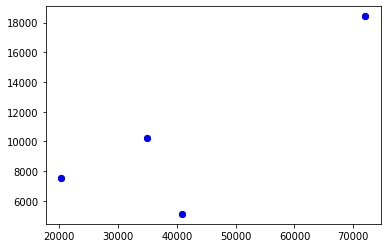

In [28]:
plt.plot(stats.length, stats.unique, "bo")

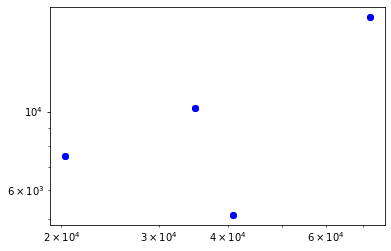

In [29]:
plt.loglog(stats.length, stats.unique, "bo")

In [30]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Ws,R&J Eng,40811,5129
2,English,Ws - copy,R&J Eng - Copy,40811,5129


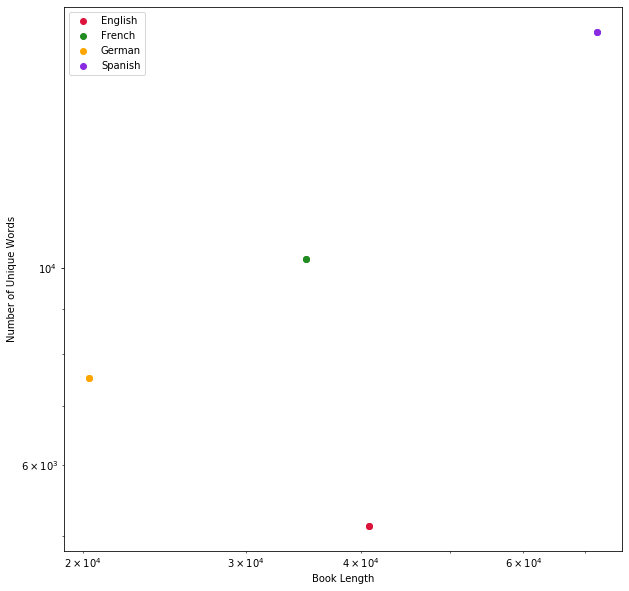

In [33]:
plt.figure(figsize = (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")

subset = stats[stats.language == "Spanish"]
plt.loglog(subset.length, subset.unique, "o", label = "Spanish", color = "blueviolet")
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")
plt.savefig("langplot.pdf")


In [35]:
stats[length]

NameError: name 'length' is not defined